# How an image is seen by computer

This notebook explains arithmetic on images. Explains methods for detecting interest points in images.



### Import required packages

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

### Opening and Analyzing the Image

1. Read the image directory location
2. Open the image
3. Display the image
4. Print the image resolution in pixels 
5. Print the image type(mode) to check the color profile. `Mode L` confirms the color profile is grayscale.

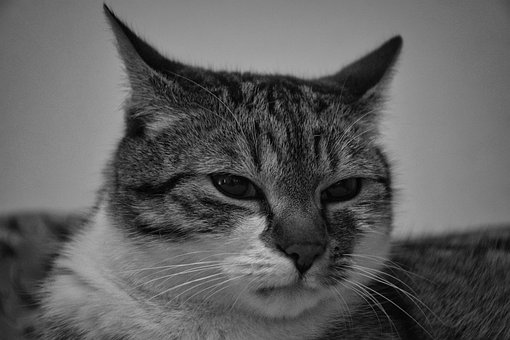

Resolution (510, 340)
mode L


In [2]:
file = "C:/Users/Bikash/jupyter-DL-exercises/cat.png"
im = Image.open(file)
display(im)
print('Resolution', im.size)
print('mode', im.mode)

### Resizing the image

1. If required, resize the above image to 32x32 pixels 
2. Check the resolution
2. Represent the image numerically as a matrix

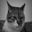

Resolution (32, 32)
[[ 90 101 105 ... 101  98  89]
 [ 96 104 108 ... 104 100  94]
 [ 99 105 111 ... 107 102  96]
 ...
 [ 47  56  81 ...  48  42  42]
 [ 50  61  73 ...  44  43  40]
 [ 49  45  60 ...  39  40  40]]


In [3]:
im_32 = im.resize((32,32))
display(im_32)
print('Resolution', im_32.size)

im_matrix = np.matrix(im_32) #converting image to matrix
print(im_matrix)

### Matrix Manipulation
1. Update row 0 with zeros
1. Print the matrix
1. Display the image
2. Replace the entire matrix with zeros
2. Print the matrix
2. Display the image

[[  0   0   0 ...   0   0   0]
 [ 96 104 108 ... 104 100  94]
 [ 99 105 111 ... 107 102  96]
 ...
 [ 47  56  81 ...  48  42  42]
 [ 50  61  73 ...  44  43  40]
 [ 49  45  60 ...  39  40  40]]


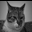

In [4]:
im_matrix[0,:]=im_matrix[0,:]*0 #multiplying row 0 with zeros
print(im_matrix)
im_r0 = Image.fromarray(im_matrix) #converting matrix to image
display(im_r0)

### Another way of obtaining the numerical values of the image

111
0
40


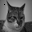

In [5]:
pixels = im_32.load()
print(pixels[2,2])
pixels[4,4]=0

# using getpixel method 
print (im_32.getpixel((4, 4))) 
cordinate = x, y = 31, 31
print (im_32.getpixel(cordinate));
display(im_32)

### Function to reduce each pixel value by half

1. The following function reduces each pixel's numerical value by 50%
2. Display the image


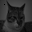

In [6]:
def half(pixel, num=0.5): 
    return pixel * num

half_im = im_32.point(half)
display(half_im)

### Invert each pixel's value

1. Substract each pixel value from 255 which means if the pixel value is 5, its inverted value is 255 - 5 = 250.  
2. Print the matrix
3. Display the image


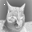

In [7]:
def inv(pixel, num=255):
    return num - pixel
inv_im = im_32.point(inv)
display(inv_im)

***Using NumPy***

[[165 154 150 ... 154 157 166]
 [159 151 147 ... 151 155 161]
 [156 150 144 ... 148 153 159]
 ...
 [208 199 174 ... 207 213 213]
 [205 194 182 ... 211 212 215]
 [206 210 195 ... 216 215 215]]


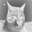

In [8]:
im_matrix = np.matrix(im_32)
matrix_inv = 255 - im_matrix 
print(matrix_inv)
im_inv = Image.fromarray(matrix_inv)
display(im_inv)

### Applying more functions

1. Clamping the image with f(x) = (100/255)x + 100
2. Quadratic transformation with f(x) = 255(x/255)^2
3. Display the images


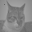

In [9]:
def clamp(pixel):
    return ((100/255)*pixel)+100
clamp_im = im_32.point(clamp)
display(clamp_im)

***Using NumPy***

[[135 139 141 ... 139 138 134]
 [137 140 142 ... 140 139 136]
 [138 141 143 ... 141 140 137]
 ...
 [118 121 131 ... 118 116 116]
 [119 123 128 ... 117 116 115]
 [119 117 123 ... 115 115 115]]


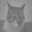

In [10]:
im_matrix = np.matrix(im_32)
im_matrix = ((100/255) * im_matrix ) + 100   #f(x) = (100/255)x + 100
im_matrix_int = im_matrix.astype(np.uint8)   #converting pixel value into uint8_t type (unsigned integers from 0 to 255)
print(im_matrix_int)
im_clamp = Image.fromarray(im_matrix_int)
display(im_clamp)

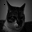

In [11]:
def quad(pixel):
    return 255 * ((pixel/255)**2)
sqr_im = im_32.point(quad)
display(sqr_im)

***Using NumPy***

[[31 40 43 ... 40 37 31]
 [36 42 45 ... 42 39 34]
 [38 43 48 ... 44 40 36]
 ...
 [ 8 12 25 ...  9  6  6]
 [ 9 14 20 ...  7  7  6]
 [ 9  7 14 ...  5  6  6]]


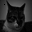

In [12]:
im_matrix = np.matrix(im_32)
im_matrix = (np.square(im_matrix/255))*255  #f(x) = 255(x/255)^2
im_matrix_int = im_matrix.astype(np.uint8)  #converting pixel value into uint8_t type (unsigned integers from 0 to 255)
print(im_matrix_int)
im_sqr = Image.fromarray(im_matrix_int)
display(im_sqr)